In [3]:
import pylab as pl
import pandas as pd
import numpy as np

%pylab inline

import os
import urllib.request as urllib
import json
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
print(os.getenv("PUIDATA"))

Populating the interactive namespace from numpy and matplotlib
/nfshome/ab8131/PUIdata


In [4]:
url = 'https://s3.amazonaws.com/tripdata/'
datestring = '201808'
fname = url+datestring+'-citibike-tripdata.csv.zip'
urllib.urlretrieve(fname, '201808.zip')
!unzip 201808.zip

Archive:  201808.zip
replace 201808-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
df = pd.read_csv('201808-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1


In [6]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,681,2018-08-01 00:00:07.3210,2018-08-01 00:11:28.9920,3162.0,W 78 St & Broadway,40.783400,-73.980931,3383.0,Cathedral Pkwy & Broadway,40.804213,-73.966991,27770,Subscriber,1986,1,2018-08-01 00:00:07.321
1,625,2018-08-01 00:00:19.7480,2018-08-01 00:10:45.0290,3260.0,Mercer St & Bleecker St,40.727064,-73.996621,2012.0,E 27 St & 1 Ave,40.739445,-73.976806,25938,Subscriber,1969,1,2018-08-01 00:00:19.748
2,1319,2018-08-01 00:00:21.1750,2018-08-01 00:22:20.6370,403.0,E 2 St & 2 Ave,40.725029,-73.990697,285.0,Broadway & E 14 St,40.734546,-73.990741,28679,Subscriber,1970,1,2018-08-01 00:00:21.175
3,220,2018-08-01 00:00:26.4700,2018-08-01 00:04:06.8190,3637.0,Fulton St & Waverly Ave,40.683239,-73.965996,399.0,Lafayette Ave & St James Pl,40.688515,-73.964763,28075,Subscriber,1982,1,2018-08-01 00:00:26.470
4,398,2018-08-01 00:00:30.2910,2018-08-01 00:07:09.2810,3662.0,31 Ave & Steinway St,40.761294,-73.916917,3517.0,31 St & Hoyt Ave N,40.771153,-73.917007,25002,Subscriber,1987,1,2018-08-01 00:00:30.291


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [8]:
df['date'] = pd.to_datetime(df['starttime'])

In [32]:
#pick 7am to 9am and 5pm to 7pm as rush hour
df_7_9 = df[(df['date'].dt.hour >= 7) & (df['date'].dt.hour < 9)]
df_17_19 = df[(df['date'].dt.hour >= 17) & (df['date'].dt.hour < 19)]


In [33]:
df_7_9.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,start_hour,stop_hour,trip_id
count,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,240643.000000,2.406430e+05
mean,786.757670,1696.641959,40.738598,-73.980044,1492.021015,40.737418,-73.983992,26072.764169,1979.724642,1.222695,7.636628,7.867788,9.717147e+05
std,3333.581354,1460.344690,0.032245,0.019438,1425.288057,0.028457,0.018891,6213.243959,11.541610,0.495899,0.480972,0.650257,5.782250e+05
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.025353,14529.000000,1885.000000,0.000000,7.000000,1.000000,2.726000e+03
25%,353.000000,393.000000,40.717571,-73.993012,360.000000,40.717548,-73.996674,19855.000000,1971.000000,1.000000,7.000000,7.000000,4.474135e+05
50%,588.000000,520.000000,40.739355,-73.981948,499.000000,40.741022,-73.986022,27616.000000,1982.000000,1.000000,8.000000,8.000000,9.358650e+05
75%,991.000000,3293.000000,40.760958,-73.969617,3233.000000,40.756405,-73.974498,31354.000000,1989.000000,2.000000,8.000000,8.000000,1.457792e+06
max,800828.000000,3705.000000,40.814394,-73.907744,3705.000000,40.814394,-73.907744,34838.000000,2002.000000,2.000000,8.000000,23.000000,1.939507e+06


In [34]:
df_7_9

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,start_hour,stop_hour,start_date,stop_date,trip_id
314967,608,2018-08-06 08:33:10.252666667,2018-08-06 08:29:47.340333334,3680.0,E 43 St & 5 Ave,40.754121,-73.980252,3255.0,8 Ave & W 31 St,40.750585,...,14529,Subscriber,1987,1,2018-08-06 08:26:24.428,8,8,2018-08-06,2018-08-06,314967
316050,1150,2018-08-06 08:49:50.630666667,2018-08-06 08:43:27.210333334,3255.0,8 Ave & W 31 St,40.750585,-73.994685,377.0,6 Ave & Canal St,40.722438,...,14529,Subscriber,1978,1,2018-08-06 08:37:03.790,8,8,2018-08-06,2018-08-06,316050
382228,1823,2018-08-07 08:50:12.869666667,2018-08-07 08:40:05.140333334,459.0,W 20 St & 11 Ave,40.746745,-74.007756,418.0,Front St & Gold St,40.702240,...,14529,Subscriber,1989,1,2018-08-07 08:29:57.411,8,9,2018-08-07,2018-08-07,382228
443594,182,2018-08-08 08:06:27.549000000,2018-08-08 08:05:26.718000000,382.0,University Pl & E 14 St,40.734927,-73.992005,483.0,E 12 St & 3 Ave,40.732233,...,14529,Subscriber,1988,2,2018-08-08 08:04:25.887,8,8,2018-08-08,2018-08-08,443594
447049,114,2018-08-08 08:36:29.649000000,2018-08-08 08:35:51.603000000,483.0,E 12 St & 3 Ave,40.732233,-73.988900,237.0,E 11 St & 2 Ave,40.730473,...,14529,Subscriber,1971,1,2018-08-08 08:35:13.557,8,8,2018-08-08,2018-08-08,447049
447285,1192,2018-08-08 08:50:44.638333334,2018-08-08 08:44:06.986666667,237.0,E 11 St & 2 Ave,40.730473,-73.986724,3443.0,W 52 St & 6 Ave,40.761330,...,14529,Subscriber,1980,1,2018-08-08 08:37:29.335,8,8,2018-08-08,2018-08-08,447285
511311,546,2018-08-09 07:35:50.854333334,2018-08-09 07:32:48.801666667,3156.0,E 72 St & York Ave,40.766638,-73.953483,3150.0,E 85 St & York Ave,40.775369,...,14529,Subscriber,1968,2,2018-08-09 07:29:46.749,7,7,2018-08-09,2018-08-09,511311
512438,241,2018-08-09 07:49:01.461666667,2018-08-09 07:47:40.897333334,3150.0,E 85 St & York Ave,40.775369,-73.948034,3372.0,E 74 St & 1 Ave,40.768974,...,14529,Subscriber,1991,1,2018-08-09 07:46:20.333,7,7,2018-08-09,2018-08-09,512438
516374,1492,2018-08-09 08:45:06.041000000,2018-08-09 08:36:48.453000000,3372.0,E 74 St & 1 Ave,40.768974,-73.954823,498.0,Broadway & W 32 St,40.748549,...,14529,Subscriber,1994,2,2018-08-09 08:28:30.865,8,8,2018-08-09,2018-08-09,516374
519571,239,2018-08-09 08:58:13.241000000,2018-08-09 08:56:53.269000000,498.0,Broadway & W 32 St,40.748549,-73.988084,466.0,W 25 St & 6 Ave,40.743954,...,14529,Subscriber,1985,1,2018-08-09 08:55:33.297,8,8,2018-08-09,2018-08-09,519571


In [35]:
# dropping NaN values
df_7_9.dropna(inplace = True)
df_17_19.dropna(inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Text(0.5,1,'5pm to 7 pm tripduration')

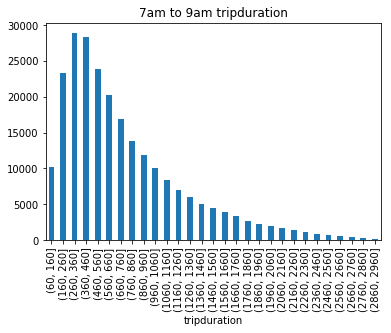

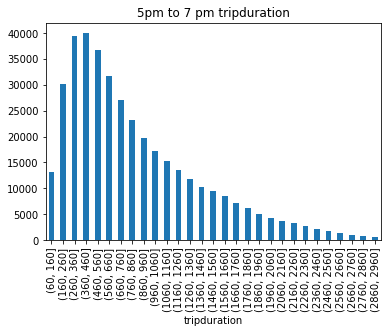

In [38]:
bins = np.arange(60,3000,100)
axD = df_7_9.tripduration.groupby(pd.cut(df_7_9.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD2 = df_17_19.tripduration.groupby(pd.cut(df_17_19.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)

axD.set_title("7am to 9am tripduration")
axD2.set_title("5pm to 7 pm tripduration")

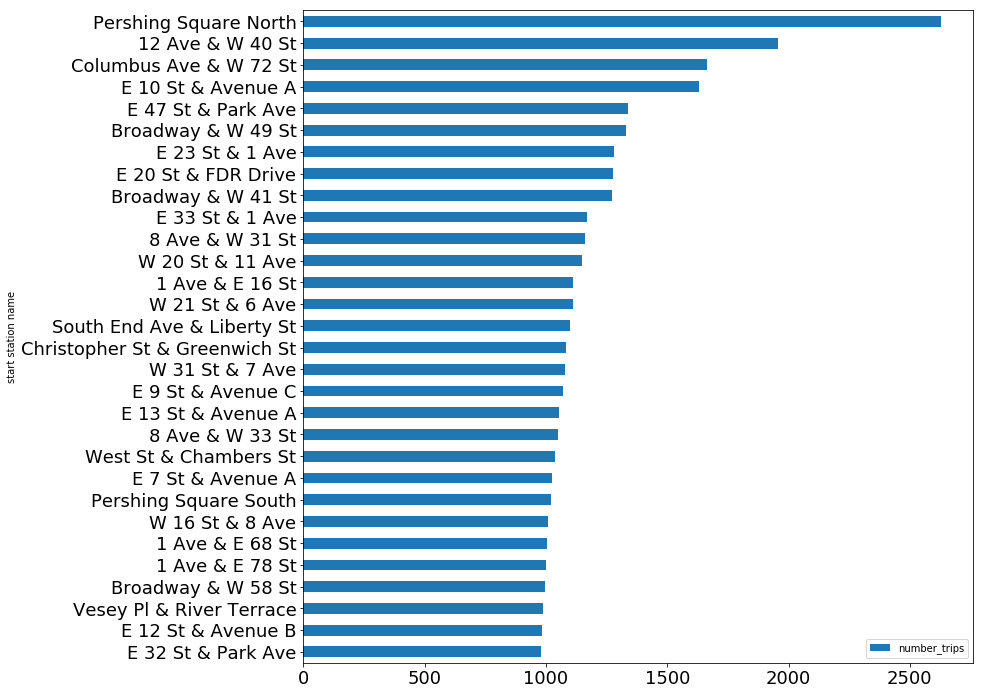

In [73]:
# top 10 starting locations at 7am to 9am 
top_starts = df_7_9.groupby(['start station name', 'start station latitude', 'start station longitude', 'start station id']).count().tripduration.sort_values(ascending = False)
top_starts = top_starts.reset_index()
top_starts['number_trips'] = top_starts.tripduration
top_starts

top_starts.sort_values('number_trips').tail(30).plot(kind = 'barh', 
                         x = 'start station name', y = 'number_trips',figsize=(12,12))
plt.tick_params(labelsize=18)


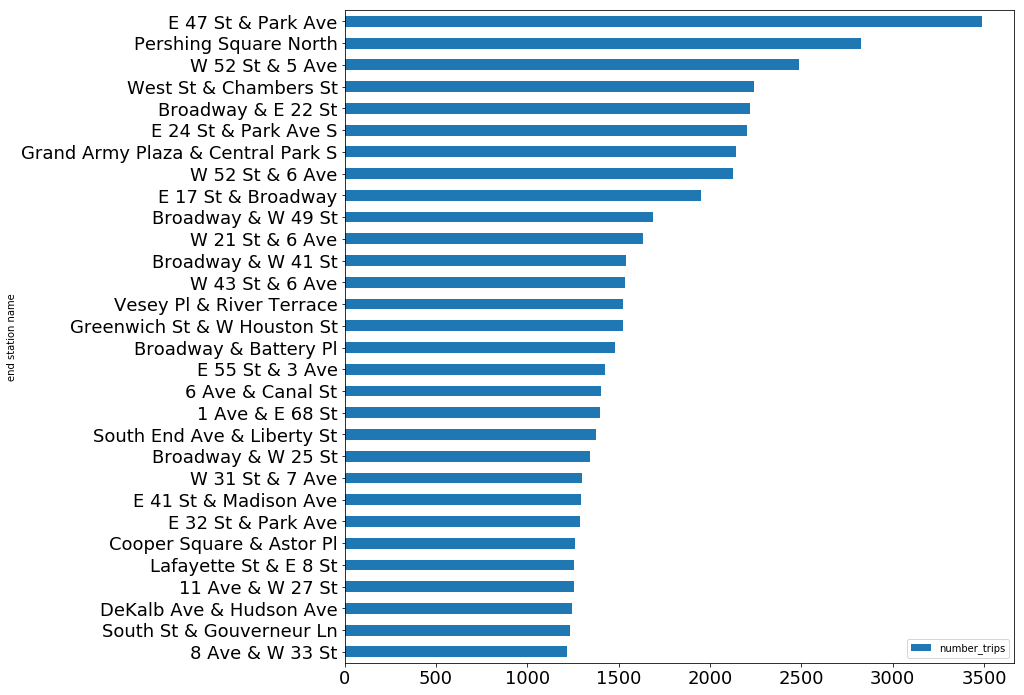

In [74]:
# top 10 stopping locations at 7am to 9 am
top_stops = df_7_9.groupby(['end station name', 'end station latitude', 'end station longitude', 'end station id']).count().tripduration.sort_values(ascending = False)
top_stops = top_stops.reset_index()
top_stops['number_trips'] = top_stops.tripduration
top_stops

top_stops.sort_values('number_trips').tail(30).plot(kind = 'barh', 
                         x = 'end station name', y = 'number_trips',figsize=(12,12))
plt.tick_params(labelsize=18)


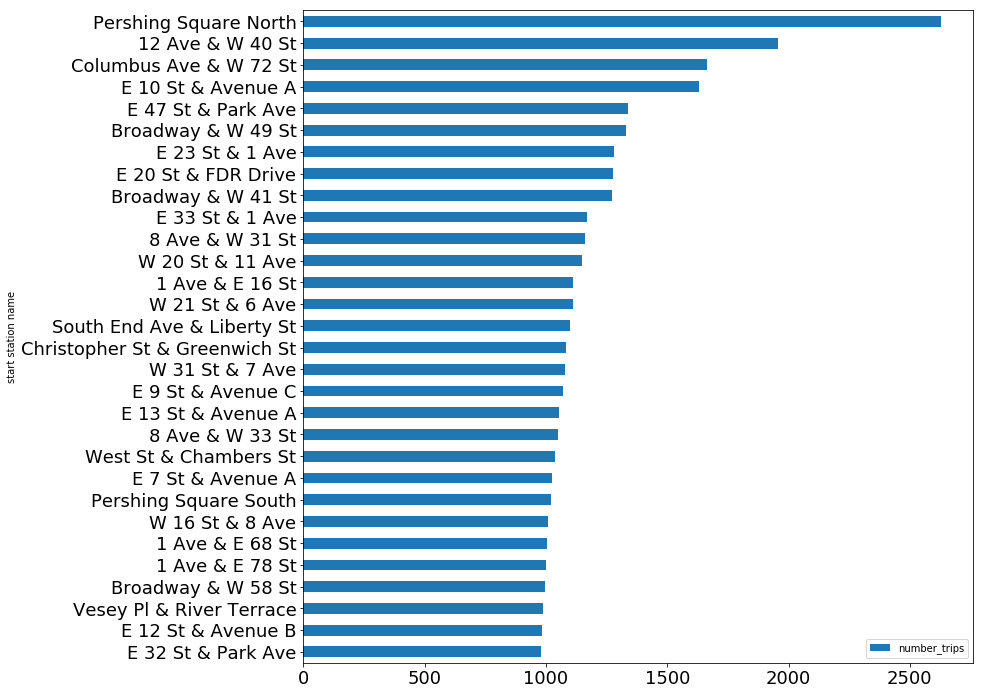

In [75]:
# top 10 starting locations at 5pm to 7pm 
top_starts2 = df_17_19.groupby(['start station name', 'start station latitude', 'start station longitude', 'start station id']).count().tripduration.sort_values(ascending = False)
top_starts2 = top_starts.reset_index()
top_starts2['number_trips'] = top_starts2.tripduration
top_starts2

top_starts2.sort_values('number_trips').tail(30).plot(kind = 'barh', 
                         x = 'start station name', y = 'number_trips',figsize=(12,12))
plt.tick_params(labelsize=18)

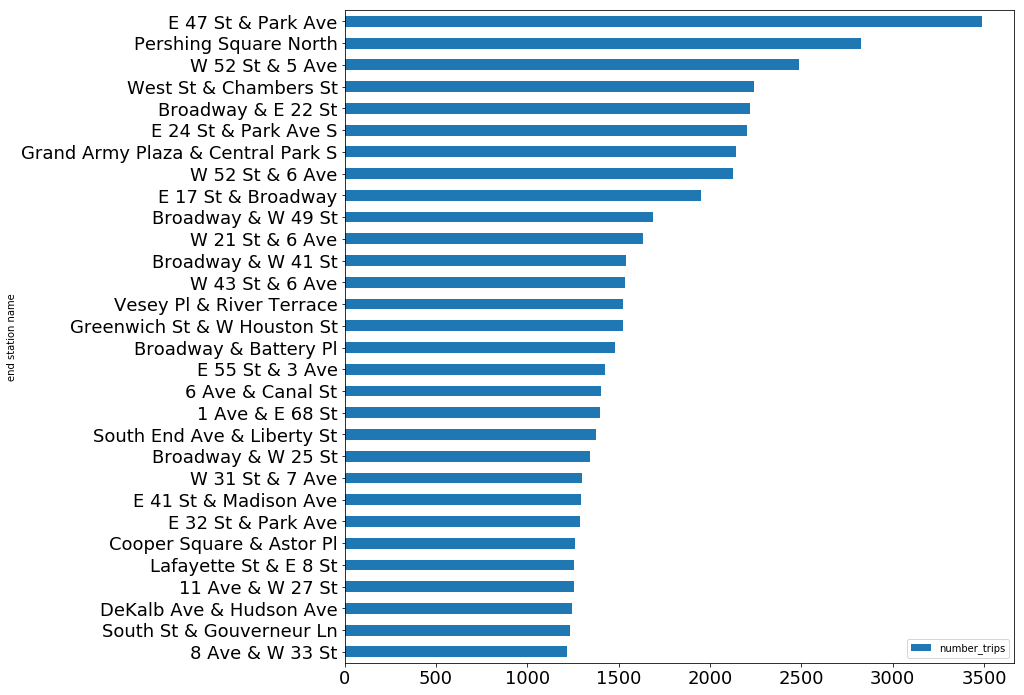

In [76]:
# top 10 stopping locations at 5pm to 7 pm
top_stops2 = df_17_19.groupby(['end station name', 'end station latitude', 'end station longitude', 'end station id']).count().tripduration.sort_values(ascending = False)
top_stops2 = top_stops.reset_index()
top_stops2['number_trips'] = top_stops2.tripduration
top_stops2

top_stops2.sort_values('number_trips').tail(30).plot(kind = 'barh', 
                         x = 'end station name', y = 'number_trips',figsize=(12,12))
plt.tick_params(labelsize=18)


it can be seen that  there is a pattern of behavior where bikes move from residential
areas to commercial areas at morning peak time and back again over the course of the day at evening peak time.

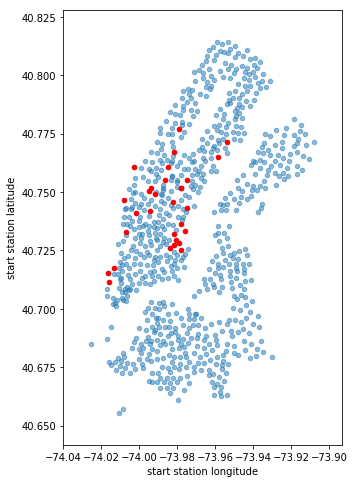

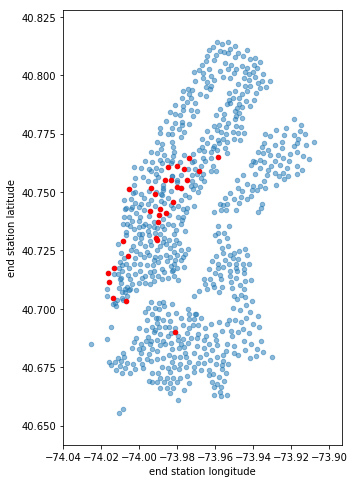

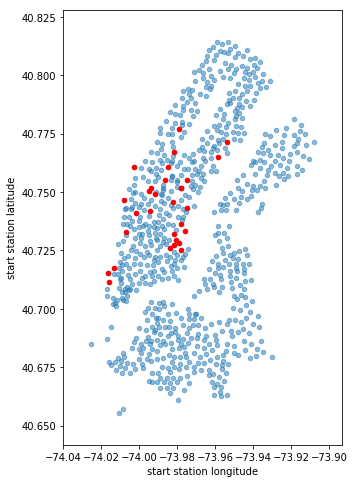

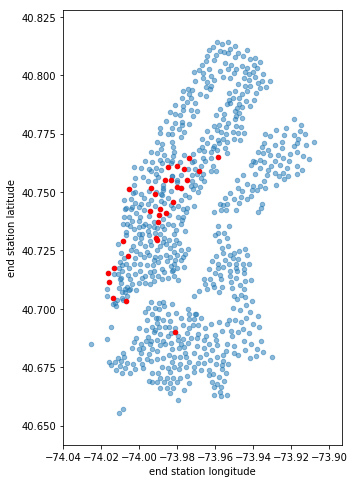

In [77]:
def plot_top_stations(df, x_values, y_values):
    pl = df.plot(kind = 'scatter', x = x_values, y = y_values, 
                alpha = 0.5, figsize = (5,8))
    df.head(30).reset_index().plot(kind = 'scatter', x = x_values,
                 color = 'r', y = y_values, ax = pl)

plot_top_stations(top_starts, 'start station longitude', 'start station latitude')
plot_top_stations(top_stops, 'end station longitude', 'end station latitude')
plot_top_stations(top_starts2, 'start station longitude', 'start station latitude')
plot_top_stations(top_stops2, 'end station longitude', 'end station latitude')

In [50]:
df_7_9['starttime'] = df_7_9['starttime'].apply(pd.to_datetime)
df_7_9['stoptime'] = df_7_9['stoptime'].apply(pd.to_datetime)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
df_7_9.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,start_hour,stop_hour,start_date,stop_date,trip_id
314967,608,2018-08-06 08:33:10.252666667,2018-08-06 08:29:47.340333334,3680.0,E 43 St & 5 Ave,40.754121,-73.980252,3255.0,8 Ave & W 31 St,40.750585,...,14529,Subscriber,1987,1,2018-08-06 08:26:24.428,8,8,2018-08-06,2018-08-06,314967
316050,1150,2018-08-06 08:49:50.630666667,2018-08-06 08:43:27.210333334,3255.0,8 Ave & W 31 St,40.750585,-73.994685,377.0,6 Ave & Canal St,40.722438,...,14529,Subscriber,1978,1,2018-08-06 08:37:03.790,8,8,2018-08-06,2018-08-06,316050
382228,1823,2018-08-07 08:50:12.869666667,2018-08-07 08:40:05.140333334,459.0,W 20 St & 11 Ave,40.746745,-74.007756,418.0,Front St & Gold St,40.702240,...,14529,Subscriber,1989,1,2018-08-07 08:29:57.411,8,9,2018-08-07,2018-08-07,382228
443594,182,2018-08-08 08:06:27.549000000,2018-08-08 08:05:26.718000000,382.0,University Pl & E 14 St,40.734927,-73.992005,483.0,E 12 St & 3 Ave,40.732233,...,14529,Subscriber,1988,2,2018-08-08 08:04:25.887,8,8,2018-08-08,2018-08-08,443594
447049,114,2018-08-08 08:36:29.649000000,2018-08-08 08:35:51.603000000,483.0,E 12 St & 3 Ave,40.732233,-73.988900,237.0,E 11 St & 2 Ave,40.730473,...,14529,Subscriber,1971,1,2018-08-08 08:35:13.557,8,8,2018-08-08,2018-08-08,447049


In [52]:
df_17_19['starttime'] = df_17_19['starttime'].apply(pd.to_datetime)
df_17_19['stoptime'] = df_17_19['stoptime'].apply(pd.to_datetime)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
df_17_19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,start_hour,stop_hour,start_date,stop_date,trip_id
286100,831,2018-08-05 17:23:03.043666667,2018-08-05 17:18:25.727333334,3467.0,W Broadway & Spring Street,40.724947,-74.001659,2008.0,Little West St & 1 Pl,40.705693,...,14529,Subscriber,1985,1,2018-08-05 17:13:48.411,17,17,2018-08-05,2018-08-05,286100
288349,1292,2018-08-05 17:56:20.442000000,2018-08-05 17:49:09.455000000,2008.0,Little West St & 1 Pl,40.705693,-74.016777,3435.0,Grand St & Elizabeth St,40.718822,...,14529,Subscriber,1991,1,2018-08-05 17:41:58.468,17,18,2018-08-05,2018-08-05,288349
293957,1686,2018-08-05 19:14:13.459000000,2018-08-05 19:04:51.435000000,3435.0,Grand St & Elizabeth St,40.718822,-73.995960,490.0,8 Ave & W 33 St,40.751551,...,14529,Subscriber,1982,2,2018-08-05 18:55:29.411,18,19,2018-08-05,2018-08-05,293957
347540,961,2018-08-06 17:49:56.012000000,2018-08-06 17:44:35.578000000,377.0,6 Ave & Canal St,40.722438,-74.005664,462.0,W 22 St & 10 Ave,40.746920,...,14529,Subscriber,1979,1,2018-08-06 17:39:15.144,17,17,2018-08-06,2018-08-06,347540
350203,865,2018-08-06 18:09:19.258000000,2018-08-06 18:04:30.791000000,462.0,W 22 St & 10 Ave,40.746920,-74.004519,265.0,Stanton St & Chrystie St,40.722293,...,14529,Subscriber,1989,1,2018-08-06 17:59:42.324,17,18,2018-08-06,2018-08-06,350203


In [54]:
oneday = df_7_9[df_7_9.starttime.dt.day == 1]

In [55]:
oneday2 = df_17_19[df_17_19.starttime.dt.day == 1]

In [56]:
bike_list = df_7_9.bikeid.unique()

# collect rebalancing events for the first 100 bikes
df_7_9= df_7_9.sort_values(['bikeid', 'starttime'])
col = ['start station id','end station id', 'starttime', 'stoptime', 'bikeid']
df_7_91 = df_7_9[df_7_9.bikeid.isin(bike_list[:100])]

# track rebalancing events 
shift_col = ['end station id','stoptime', 'end station longitude', 'end station latitude', 'end station name']

def shift_con(bike_df):
    bike_df[shift_col] = bike_df[shift_col].shift(1)
    return bike_df[bike_df["start station id"] != bike_df["end station id"]]

In [57]:
rebal_df_7_9 = df_7_9.groupby('bikeid').apply(shift_con).dropna()
rebal_df_7_9.index = rebal_df_7_9.index.droplevel('bikeid')

In [58]:
rebal_times = ((rebal_df_7_9.starttime - rebal_df_7_9.stoptime) / 2) + rebal_df_7_9.stoptime
rebal_spreads = (rebal_df_7_9.starttime - rebal_df_7_9.stoptime) / 2

In [59]:
df_7_9['start_hour'] = df_7_9.starttime.dt.hour
df_7_9['stop_hour'] = df_7_9.stoptime.dt.hour
df_7_9[['start_date', 'stop_date']] = df_7_9[['starttime', 'stoptime']].apply(lambda x: x.dt.floor('d'))
df_7_9.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,date,start_hour,stop_hour,start_date,stop_date,trip_id
1459164,638,2018-08-24 08:11:21.670000000,2018-08-24 08:07:48.932000000,332.0,Cherry St,40.712199,-73.979481,337.0,Old Slip & Front St,40.703799,...,34835,Subscriber,1953,1,2018-08-24 08:04:16.194,8,8,2018-08-24,2018-08-24,1459164
1657643,1487,2018-08-27 08:18:35.654666667,2018-08-27 08:10:19.704333334,514.0,12 Ave & W 40 St,40.760875,-74.002777,427.0,Bus Slip & State St,40.701907,...,34835,Subscriber,1977,1,2018-08-27 08:02:03.754,8,8,2018-08-27,2018-08-27,1657643
1923179,1389,2018-08-31 07:50:48.916666667,2018-08-31 07:43:05.814333334,261.0,Johnson St & Gold St,40.694749,-73.983625,472.0,E 32 St & Park Ave,40.745712,...,34838,Subscriber,1993,1,2018-08-31 07:35:22.712,7,7,2018-08-31,2018-08-31,1923179
1924572,541,2018-08-31 08:05:10.971666667,2018-08-31 08:02:10.444333334,472.0,E 32 St & Park Ave,40.745712,-73.981948,454.0,E 51 St & 1 Ave,40.754557,...,34838,Subscriber,1991,1,2018-08-31 07:59:09.917,8,8,2018-08-31,2018-08-31,1924572
1926932,1100,2018-08-31 08:43:04.177000000,2018-08-31 08:36:57.202000000,454.0,E 51 St & 1 Ave,40.754557,-73.965930,3312.0,1 Ave & E 94 St,40.781721,...,34838,Subscriber,1986,1,2018-08-31 08:30:50.227,8,8,2018-08-31,2018-08-31,1926932


In [60]:
def create(df, id_key, date_key, hour_key, fl_key):
    # start is associated with an fl_key = 'fluxs_out',
    # and stop is associated with fl_key = 'fluxs_in'
    use_col = [id_key, date_key, hour_key, 'tripduration']
    fluxs = df.groupby([id_key, date_key, hour_key]).count()
    fluxs = fluxs.reset_index()[use_col]
    col_dict = {'tripduration': fl_key,
                date_key: 'date', hour_key: 'hour',
                id_key: 'id'}
    return fluxs.rename(columns = col_dict)

def transforming(df):
    # calculate approximate pickup and drop-off times for rebalancing trips
    t_start = df.starttime
    t_end = df.stoptime
    time_diff = t_start - t_end

    r_start = t_end + time_diff/3.
    r_end = t_end + time_diff*(2/3.)

    df['starttime'] = r_start
    df['stoptime'] = r_end
    return df.rename(columns = {'start_id':'stop_id', 'stop_id':'start_id'})


def merge_fluxs(df1, df2):
    # concatenate fluxes or any other dataset with the keys
    # 'id' 'date' and 'hour
    return pd.merge(df1, df2, how='outer',
                              on = ['id', 'date', 'hour']).fillna(0)

In [61]:
# create fluxes from normal trips and merge
bikes_out = create(df_7_9, 'start station id', 'start_date','start_hour', 'bikes_out')
bikes_in = create(df_7_9, 'end station id', 'stop_date','stop_hour', 'bikes_in')

merged = merge_fluxs(bikes_out, bikes_in)

In [62]:
merged.head()

,id,date,hour,bikes_out,bikes_in
0,72.0,2018-08-01,7.0,8.0,2.0
1,72.0,2018-08-01,8.0,21.0,9.0
2,72.0,2018-08-01,9.0,1.0,0.0
3,72.0,2018-08-02,7.0,9.0,2.0
4,72.0,2018-08-02,8.0,7.0,9.0


In [63]:
df_7_9['trip_id'] = df_7_9.index.values

In [27]:
def transforming(df):
    # calculate approximate pickup and drop-off times for rebalancing trips
    t_start = df.starttime
    t_end = df.stoptime
    time_diff = t_start - t_end

    r_start = t_end + time_diff/3.
    r_end = t_end + time_diff*(2/3.)
    
    df['starttime'] = r_start
    df['stoptime'] = r_end
    return df.rename(columns = {'start_id':'stop_id', 'stop_id':'start_id'})

In [64]:
# merge rebal fluxes
rebals = transform_times(df_7_9)
#create fluxes from rebalanced trips
rflux_out = create(rebals, 'start station id', 'start_date', 'start_hour', 'rbikes_out')
rflux_in = create(rebals, 'end station id', 'stop_date', 'stop_hour', 'rbikes_in')

rmerged = merge_flux(rflux_out, rflux_in)
rmerged['rebal_net_flux'] = rmerged.rbikes_in - rmerged.rbikes_out
rmerged = rmerged.drop(['rbikes_in', 'rbikes_out'], axis=1)

In [65]:
rmerged.head()

,id,date,hour,rebal_net_flux
0,72.0,2018-08-01,7.0,-6.0
1,72.0,2018-08-01,8.0,-12.0
2,72.0,2018-08-01,9.0,-1.0
3,72.0,2018-08-02,7.0,-7.0
4,72.0,2018-08-02,8.0,2.0


In [66]:
merged.head()

,id,date,hour,bikes_out,bikes_in
0,72.0,2018-08-01,7.0,8.0,2.0
1,72.0,2018-08-01,8.0,21.0,9.0
2,72.0,2018-08-01,9.0,1.0,0.0
3,72.0,2018-08-02,7.0,9.0,2.0
4,72.0,2018-08-02,8.0,7.0,9.0


In [67]:
rebalance = merge_flux(merged, rmerged)
frebalance

,id,date,hour,bikes_out,bikes_in,rebal_net_flux
0,72.0,2018-08-01,7.0,8.0,2.0,-6.0
1,72.0,2018-08-01,8.0,21.0,9.0,-12.0
2,72.0,2018-08-01,9.0,1.0,0.0,-1.0
3,72.0,2018-08-02,7.0,9.0,2.0,-7.0
4,72.0,2018-08-02,8.0,7.0,9.0,2.0
5,72.0,2018-08-02,9.0,1.0,1.0,0.0
6,72.0,2018-08-03,7.0,2.0,3.0,1.0
7,72.0,2018-08-03,8.0,17.0,9.0,-8.0
8,72.0,2018-08-03,9.0,4.0,0.0,-4.0
9,72.0,2018-08-04,7.0,4.0,1.0,-3.0


according to the number of bikes out and bikes in, we can predict the net number of bikes which need to be rebalanced.
In this way we can make the rebalancing work of Citibike company more efficient and make NYC commuters life more convenient in peak hours.